# Garage Classifcation Model

## Goal: Given coordinate points along a path, classify whether a person is headed towards the garage.

---

In [20]:
import pandas as pd
import numpy as np

In [21]:
df = pd.read_csv('../simulations/csv_paths/cottage_grove_paths.csv')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 62 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      92 non-null     object 
 1   latitude_1                      92 non-null     float64
 2   longitude_1                     92 non-null     float64
 3   altitude_relative_to_ground_1   92 non-null     float64
 4   latitude_2                      92 non-null     float64
 5   longitude_2                     92 non-null     float64
 6   altitude_relative_to_ground_2   92 non-null     float64
 7   latitude_3                      92 non-null     float64
 8   longitude_3                     92 non-null     float64
 9   altitude_relative_to_ground_3   92 non-null     float64
 10  latitude_4                      92 non-null     float64
 11  longitude_4                     92 non-null     float64
 12  altitude_relative_to_ground_4   92 non

In [23]:
df.head()

,Unnamed: 0,latitude_1,longitude_1,altitude_relative_to_ground_1,latitude_2,longitude_2,altitude_relative_to_ground_2,latitude_3,longitude_3,altitude_relative_to_ground_3,...,latitude_18,longitude_18,altitude_relative_to_ground_18,latitude_19,longitude_19,altitude_relative_to_ground_19,latitude_20,longitude_20,altitude_relative_to_ground_20,enter-parking
0,10_A.xml,36.111200,-115.141654,0.0,36.111206,-115.141554,0.0,36.111211,-115.141400,0.0,...,36.110529,-115.140651,0.0,36.110555,-115.140550,0.0,36.110629,-115.140521,0.0,1
1,10_A_Missed.xml,36.109699,-115.140636,0.0,36.109756,-115.140660,0.0,36.109795,-115.140685,0.0,...,36.110881,-115.140836,0.0,36.110995,-115.140851,0.0,36.111160,-115.140860,0.0,0
2,10_B.xml,36.110692,-115.141014,0.0,36.110658,-115.140986,0.0,36.110627,-115.140952,0.0,...,36.110594,-115.139715,0.0,36.110633,-115.139636,0.0,36.110667,-115.139667,0.0,1
3,10_B_Missed.xml,36.110448,-115.139256,0.0,36.110419,-115.139264,0.0,36.110380,-115.139272,0.0,...,36.109740,-115.139144,0.0,36.109708,-115.139112,0.0,36.109650,-115.139100,0.0,0
4,11_A.xml,36.109695,-115.140862,0.0,36.109748,-115.140871,0.0,36.109808,-115.140878,0.0,...,36.110561,-115.140546,0.0,36.110599,-115.140523,0.0,36.110638,-115.140528,0.0,1


In [24]:
# Get First Coordinate Pair Only -> Columns [1, 6]
X = df[df.columns[1:61]]
label = df['enter-parking'].values

In [25]:
print(X)
print(label)

    latitude_1  longitude_1  altitude_relative_to_ground_1  latitude_2  \
0    36.111200  -115.141654                            0.0   36.111206   
1    36.109699  -115.140636                            0.0   36.109756   
2    36.110692  -115.141014                            0.0   36.110658   
3    36.110448  -115.139256                            0.0   36.110419   
4    36.109695  -115.140862                            0.0   36.109748   
..         ...          ...                            ...         ...   
87   36.110949  -115.138459                            0.0   36.110880   
88   36.109628  -115.141544                            0.0   36.109697   
89   36.109490  -115.140931                            0.0   36.109541   
90   36.109708  -115.140845                            0.0   36.109824   
91   36.110942  -115.138463                            0.0   36.110884   

    longitude_2  altitude_relative_to_ground_2  latitude_3  longitude_3  \
0   -115.141554                     

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,label,test_size=0.25,random_state=101)

In [28]:
# Scale data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Tensorflow imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
X_train.shape

(69, 60)

In [31]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
# Model creation
model = Sequential()

# 6 neurons for input layer
model.add(Dense(60, input_dim=60, activation='relu'))
# turn off half the neurons in each batch
model.add(Dropout(0.3))

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.3))

# Binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam')

In [32]:
model.fit(x=X_train,
          y=y_train,
          epochs=300,
          validation_data=(X_test, y_test),
          callbacks=early_stop)

Epoch 1/300
3/3 [==============================] - 1s 55ms/step - loss: 0.7825 - val_loss: 0.7490
Epoch 2/300
3/3 [==============================] - 0s 16ms/step - loss: 0.7297 - val_loss: 0.7173
Epoch 3/300
3/3 [==============================] - 0s 8ms/step - loss: 0.6975 - val_loss: 0.7005
Epoch 4/300
3/3 [==============================] - 0s 16ms/step - loss: 0.7061 - val_loss: 0.6921
Epoch 5/300
3/3 [==============================] - 0s 8ms/step - loss: 0.7048 - val_loss: 0.6869
Epoch 6/300
3/3 [==============================] - 0s 29ms/step - loss: 0.6714 - val_loss: 0.6809
Epoch 7/300
3/3 [==============================] - 0s 12ms/step - loss: 0.6629 - val_loss: 0.6738
Epoch 8/300
3/3 [==============================] - 0s 6

In [33]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

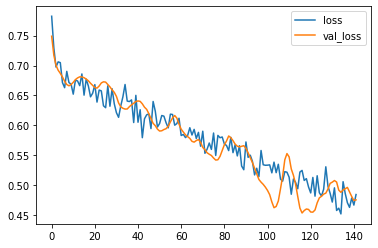

In [34]:
losses.plot()

In [35]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.64      0.70        11
           1       0.71      0.83      0.77        12

    accuracy                           0.74        23
   macro avg       0.75      0.73      0.73        23
weighted avg       0.74      0.74      0.74        23



In [38]:
print(confusion_matrix(y_test, predictions))

[[ 7  4]
 [ 2 10]]


In [39]:
model.save('saved_model/')

INFO:tensorflow:Assets written to: saved_model/assets
